In [1]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialize Spark
spark = SparkSession.builder.appName("StudentPerformanceFactorsAnalysis").getOrCreate()

# Load dataset
df = spark.read.csv("StudentPerformanceFactors.csv", header=True, inferSchema=True)

# Drop duplicates and nulls
df = df.dropDuplicates().na.drop()

# Convert to Pandas for visualization
pandas_df = df.toPandas()

sns.set(style="whitegrid")

# Preview
print("Columns:", pandas_df.columns.tolist())
pandas_df.head()


Columns: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,79,Medium,High,Yes,6,97,Medium,Yes,1,High,Low,Public,Neutral,4,No,High School,Moderate,Male,69
1,26,71,Medium,Low,No,6,94,Low,Yes,3,Low,Medium,Public,Positive,4,No,Postgraduate,Near,Male,68
2,11,93,Medium,Medium,Yes,6,72,Low,Yes,2,Low,Medium,Public,Negative,3,No,College,Moderate,Male,66
3,26,61,Low,Medium,Yes,5,51,High,Yes,0,Low,Medium,Private,Neutral,5,No,High School,Moderate,Female,62
4,21,83,Medium,Medium,Yes,8,75,High,Yes,1,Low,High,Public,Neutral,2,No,High School,Far,Male,67


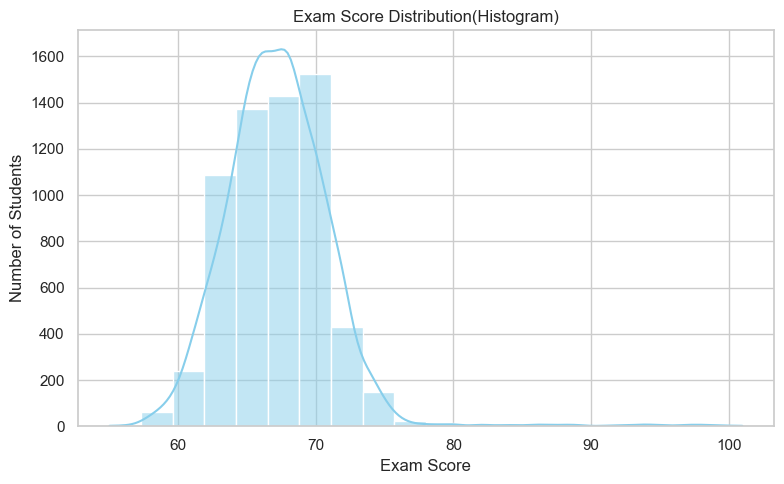

In [3]:
plt.figure(figsize=(8, 5))
sns.histplot(pandas_df['Exam_Score'], bins=20, kde=True, color='skyblue')
plt.title("Exam Score Distribution(Histogram)")
plt.xlabel("Exam Score")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.savefig("histogram_exam_score.png")
plt.show()


C:\Users\naresh\AppData\Local\Temp\ipykernel_26716\2617358192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=pandas_df, palette='pastel')


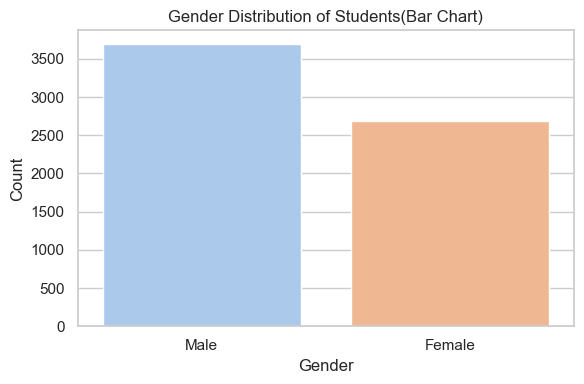

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=pandas_df, palette='pastel')
plt.title("Gender Distribution of Students(Bar Chart)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("barchart_gender.png")
plt.show()


C:\Users\naresh\AppData\Local\Temp\ipykernel_26716\1446036483.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='School_Type', data=pandas_df, palette='muted')


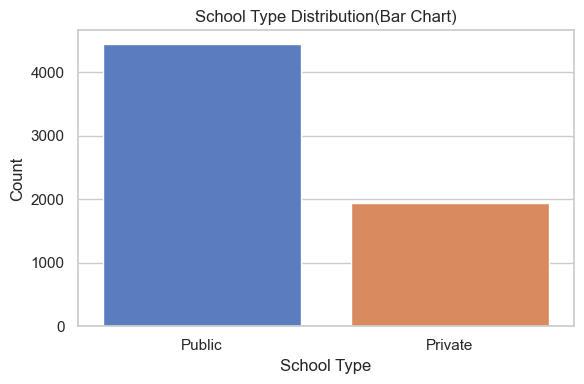

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='School_Type', data=pandas_df, palette='muted')
plt.title("School Type Distribution(Bar Chart)")
plt.xlabel("School Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("barchart_school_type.png")
plt.show()


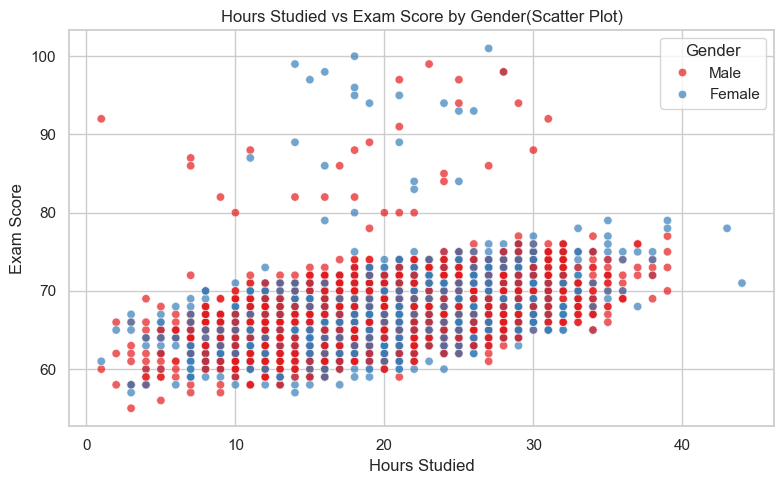

In [6]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', hue='Gender', data=pandas_df, palette='Set1', alpha=0.7)
plt.title("Hours Studied vs Exam Score by Gender(Scatter Plot)")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.tight_layout()
plt.savefig("scatterplot_hours_vs_exam.png")
plt.show()


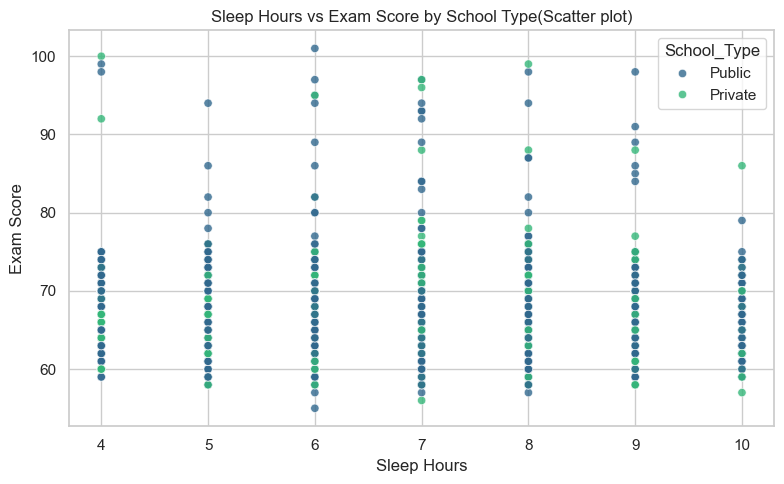

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Sleep_Hours', y='Exam_Score', hue='School_Type', data=pandas_df, palette='viridis', alpha=0.8)
plt.title("Sleep Hours vs Exam Score by School Type(Scatter plot)")
plt.xlabel("Sleep Hours")
plt.ylabel("Exam Score")
plt.tight_layout()
plt.savefig("scatterplot_sleep_vs_exam.png")
plt.show()


C:\Users\naresh\AppData\Local\Temp\ipykernel_26716\3856781439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Parental_Education_Level', data=pandas_df, palette='cool')


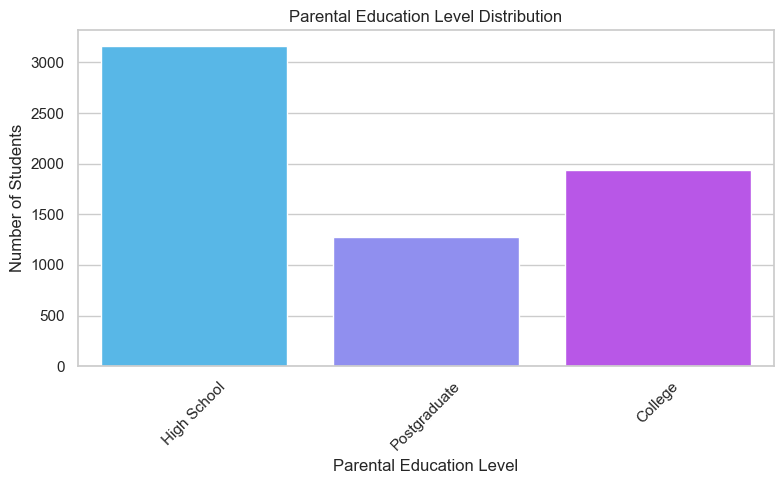

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Parental_Education_Level', data=pandas_df, palette='cool')
plt.title("Parental Education Level Distribution")
plt.xlabel("Parental Education Level")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("barchart_parent_education.png")
plt.show()


C:\Users\naresh\AppData\Local\Temp\ipykernel_26716\2426419610.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Parental_Education_Level', y='Exam_Score', data=pandas_df, palette='Set2')


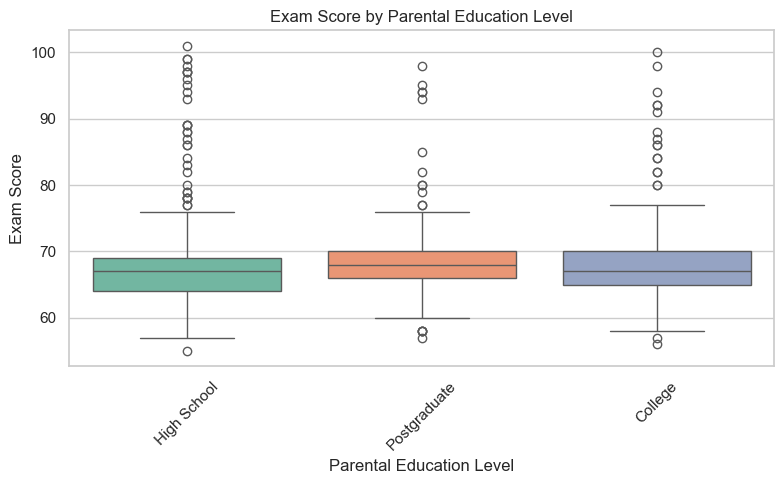

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Parental_Education_Level', y='Exam_Score', data=pandas_df, palette='Set2')
plt.title("Exam Score by Parental Education Level")
plt.xlabel("Parental Education Level")
plt.ylabel("Exam Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("boxplot_exam_by_parent_education.png")
plt.show()


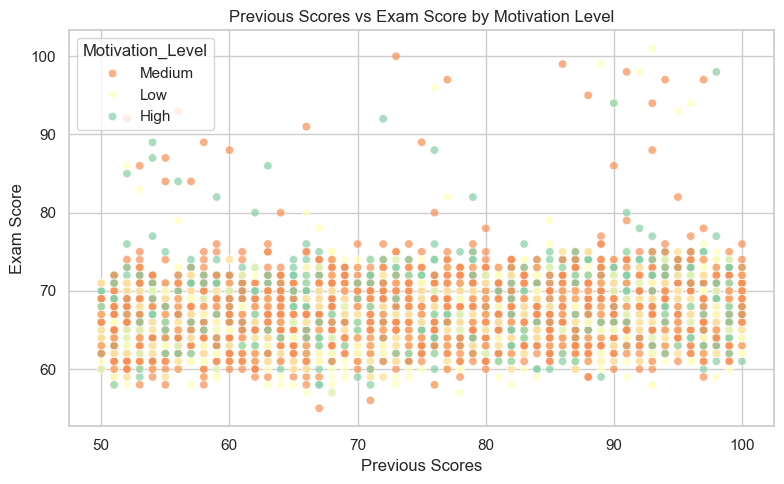

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Previous_Scores', y='Exam_Score', hue='Motivation_Level', data=pandas_df, palette='Spectral', alpha=0.7)
plt.title("Previous Scores vs Exam Score by Motivation Level")
plt.xlabel("Previous Scores")
plt.ylabel("Exam Score")
plt.tight_layout()
plt.savefig("scatterplot_previous_vs_exam.png")
plt.show()
